# Assessment for Machine Learning

## Assessment description

*Paraphrased from the assignment documentation* ... create a web service that uses machine learning to make predictions based on the data set powerproduction provided. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. The submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.

## Introduction

In this assignment it is intended to try and determine which method of regression best suits the data presented. In order to do this, the data presented will be split into a training set, comprising between 70 – 80% of the data given, and a test, comprising the remaining 20 – 30%. Regression analysis will be run against the training set, and then compared to the actual results. This analysis will allow for the accuracy of the regression models to be ranked, and determine which model is most accurate.

In addition, the models produced will be saved, and used a website (also found in this GitHub repository). This will allow users to input their own data, and have the various models estimate the outcome.

In total, there will be 3 regression analysis models, namely a linear regression, a decision tree regression, and a random forest regression model. Additionally, there will be a sigmoid analysis model, using a best fit curve. While this is strictly not a regression analysis model, the data seemed to fit the curve, and it was felt that the best models should be used.

## Libraries

Before any analysis can be conducted, it is necessary to import and set up the libraries that will be needed for the poroject. The following libraries are required to process the data, and create the regression models.

    1) Joblib: For saving and retrieving the regression models.
    2) Matplotlib.pyplot: To display the graphs and plots of the data.
    3) Numpy: To complete the error and regression calculations.
    4) Pandas: To store the data in a coherent frame.
    5) Prettytable: To create tables from the data.
    6) Scipy.optimize: To calculate the best curve for the sigmoid regression.
    7) Sklearn: To complete the data splitting, linear, decision tree, and random forest regression, as well as error
        calculation.

In [28]:
# Import the relevant libraries
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prettytable import PrettyTable
from scipy.optimize import curve_fit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

## Data Source and Cleansing
The data was provided by the lecturer, and can be found in the <a href=“source_data”>source data</a> folder. 

In [29]:
# Source and analysis the data
source_df = pd.read_csv("Source_data/Source_file.csv")          # Read in the source data

print()
print("Source Data descriptions")
print("------------------------")
print(source_df.describe())                                     # Display the general description of the source data


Source Data descriptions
------------------------
            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


A description of the imported data, using pandas, shows that the data consists 2 columns of data, as follows:

    1)	Speed (column 1): a set of speed measurments (presumed to be in metres per second).
    2)	Power (column 2): a set of power measurments (presumed to be in kiloWatts per hour), corresponding to a speed 
            measurement.

Each column is made up of 500 rows, with a range of wind speeds from 0 to 25 m/s, and corresponding power values of 0 to 113.556 kW/h. Variuos means, and quartile ranges are given, but this does not give further indication of the shape of the data.

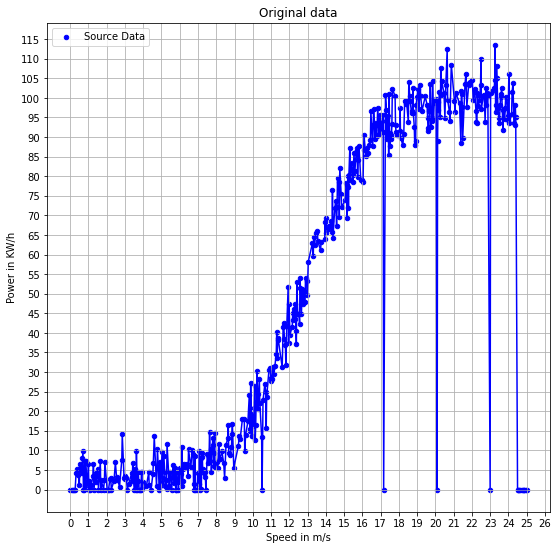

In [30]:
# Plot the data
plt.figure(figsize = (9, 9))                                    # Set the plot size
plt.plot(source_df["speed"], source_df["power"], color = "b")   # Plot the speed and power on a graph, with blue lines between the points
plt.scatter(x = source_df["speed"], y = source_df["power"], s = 20, color = "b", label = "Source Data") # Plot the speed and power on a graph, as black points
plt.xticks(np.arange(0, round(source_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(source_df["power"].max(), 0) + 4, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KW/h")                                     # Label the y axis
plt.xlabel("Speed in m/s")                                      # Label the x axis
plt.legend(loc = "best")                                        # Put the legend in the best place
plt.title("Original data")                                      # Title of the graph
plt.show()                                                      # Show the graph

The plot of the data that the data is roughly S-shaped, or similar to the sigmoid function. Additionally, the plot also shows that there are a number of power values of 0, where there are positive wind speed. This is quite noticeable at wind speeds of approx. 10.5, 17, 20, 23, and above 24.5 m/s. 

These power to wind speed values could provide skewed data, as it does not seem reasonable that the wind is blowing, but not generating any power. As such they will be removed to enable more accurate regression modelling. To do this, any row where the power value is equal to 0, but the wind speed value is not equal to 0 will be removed.

In [31]:
# Creating the cleansed data
cleansed_df = source_df.loc[(source_df["power"] != 0) | ((source_df["speed"] == 0) & (source_df["power"] == 0))]    # Clean the data and drop all locations where there is a wind speed greater than 0, and no power data.

print("Cleansed Data descriptions")
print("--------------------------")
print(cleansed_df.describe())                                   # Display the general description of the cleansed data

Cleansed Data descriptions
--------------------------
            speed       power
count  452.000000  452.000000
mean    12.975531   53.113478
std      6.855738   40.554469
min      0.000000    0.000000
25%      7.294500    8.412750
50%     13.013000   56.123500
75%     18.775250   94.698250
max     24.399000  113.556000


The description of the cleansed data shows that 48 rows of speed have been removed. This has resulted in minor changes to the ranges of the wind speeds and power data. The max wind speed has been reduced from 25 to 24.399 m/s, while the quartile values for both speed and power have increased. The standard deviation for  both data sets has also reduced, suggesting that more of the values are within 1 standard deviation of the mean (for the cleansed data).

A plot of both the source and cleansed data shows that the shape of the overall data set has not been visibly altered. The blue dots at teh bottom of the graph, from the original data set, have been removed from the cleansed data set.

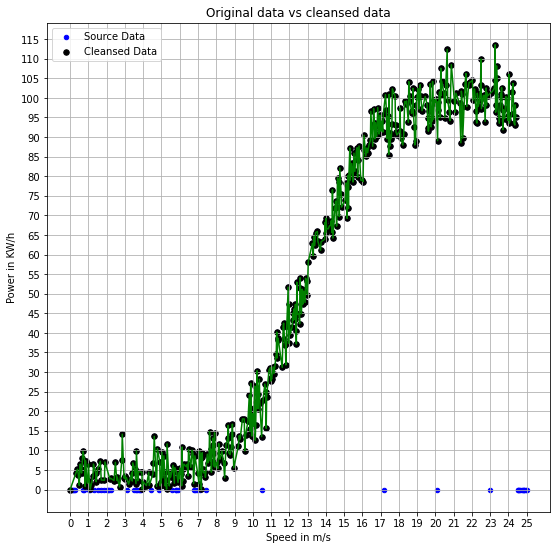

In [32]:
# Replot the source and cleansed data
plt.figure(figsize = (9, 9))                                    # Set the plot size
plt.plot(cleansed_df["speed"], cleansed_df["power"], color = "g") # Plot the speed and power on a graph, with green lines between the points
plt.scatter(x = source_df["speed"], y = source_df["power"], s = 20, color = "b", label = "Source Data") # Plot the speed and power on a graph, as black points
plt.scatter(x = cleansed_df["speed"], y = cleansed_df["power"], s = 30, color = "k", label = "Cleansed Data") # Plot the speed and power on a graph, as black points
plt.xticks(np.arange(0, round(cleansed_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(cleansed_df["power"].max(), 0) + 4, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KW/h")                                     # Label the y axis
plt.xlabel("Speed in m/s")                                      # Label the x axis
plt.legend(loc = "best")                                        # Put the legend in the best place
plt.title("Original data vs cleansed data")                     # Title of the graph
plt.show()                                                      # Show the graph

## Splitting data
In order to conduct any regression analysis, it is necessary to split the data into training and testing data sets. The allocation of the data is done at random, in order to ensure the model has an even distribution of all values to be analysed. In this case the data is split using <a hreaf = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html>Sklearn’s train_test_split library </a>, with a test size of 25% of the data set. The random state is set to 0 solely to maintain the consistency of the data.


In [33]:
# Splitting data into training and testing arrays
sp_ar, po_ar = cleansed_df["speed"].values, cleansed_df["power"].values # Split the data into separate speed and power arrays

sp_train_ar, sp_test_ar, po_train_ar, po_test_ar = train_test_split(sp_ar, po_ar, test_size = 0.25, random_state = 0)   # Split the arrays into testing (75%) and training (25%) arrays, using random state value 0

print("Training set: %d rows\nTest set: %d rows" %(sp_train_ar.size, sp_test_ar.size))  # Print the size of the training and testing arrays

Training set: 339 rows
Test set: 113 rows


Using this split size results in a training set consisting of 339 rows, and a test set of 113 rows, as above.

### Why do we split the data?
The data is split for a number of reasons. If the data set is large enough, a number of the regression model generation techniques can be quiet resource or cost intensive. By splitting the data, the resources required and/or costs can be reduced <a href =”https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms”> (Brownlee, 2020)</a>. Additionally, splitting the data helps to reduce the risk of overfitting the data when the entire data set is used <a href="https://qr.ae/pNxQZ8">(Chowdhury, 2018)</a>, <a href=”https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6”> (Bronshtein, 2017)</a>

In this case, as the data is large enough, we can split the data into the two sets (training and testing), and still maintain enough of the data to conduct regression analysis, without significant cost or resource implications.


***
## Linear Regression

### What is a linear regression?
A regression model is used to examine the relationship between two or variables <a href=https://realpython.com/linear-regression-in-python/>(Stojiljković, 2020)</a>. In the case of just two variables, then the regression is a linear regression. In regression analysis, as the independent variable changes, the dependent variables values also change. In the case of the data given for this assignment, the independent variable is the wind speed, with the dependent variable being the power generated. 

In linear regression, the relationship between the independent and dependent variable is normally proportional. This means that on a graph, a straight line can be plotted, with a constant slope, and a determined formula.

### Linear regression code
The linear regression code is run using <a href=https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>Sklearn’s linear regression library</a>. In this case, the training sets for speed and power are used to help train the model. It should be noted that the linear regression model can return a negative value for power generation. A negative number would indicate that as the wind is blowing, the wind turbines are drawing power from the grid in order to help them turn. This would seem to be incorrect. As such, the <b><u>*fit_intercept*</b></u> is set to false, meaning that the intercept of the slope will be [0, 0], or that 0 m/s wind speed produces 0 kW/h power.

The model is saved to the <a href=”Models/”>Models folder</a>, as *lin_reg.pkl*, where it can be retrieved for further use, as required.


In [34]:
# Create the linear regression model
lin_model = LinearRegression(fit_intercept=False).fit(sp_train_ar.reshape(-1,1), po_train_ar)   # Create the linear regression model, using the speed and power trainign arrays.
                                                                                                # Note that the intercept is set to 0, as there should not be negative power.
# Save the linear regression model
filename_lin ="Models/lin_reg.pkl"                              # State the file save location
joblib.dump(lin_model, filename_lin)                            # Save the model as lin_reg in the model folder

['Models/lin_reg.pkl']

### Actual vs predictions
The model can be used to determine how far away the values predicted are from the actual values. Visually, this can be done by using the values in the speed testing array (sp_test_ar) in the regression model, and plotting them against the actual values. This can be seen in the plot below (Linear regression: test actual vs predicted data).

A mathematical review can also be used, and will be conducted in a later section.

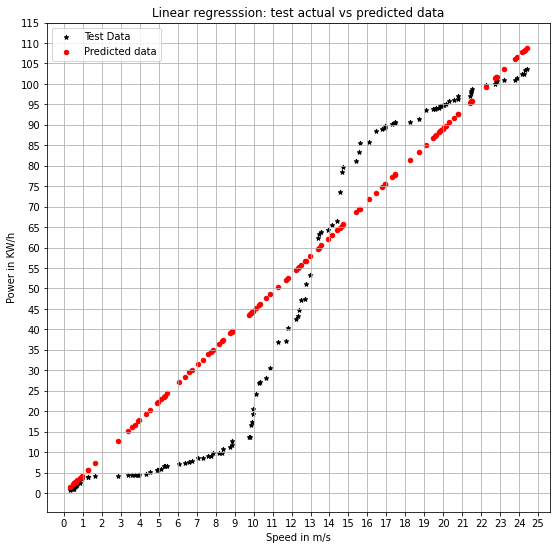

In [35]:
# Generate the predictions array
predict_lin = lin_model.predict(sp_test_ar.reshape(-1,1))        # Use the model to predict the power values using the speed test array 

# Plot the actual vs predictions array for the linear regression model
plt.figure(figsize = (9, 9))                                    # Set the plot size
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(po_test_ar), s = 20, marker = "*", color = "k", label = "Test Data") # Plot the speed and power on a graph
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(predict_lin), s = 20, color = "r", label = "Predicted data") # Plot the speed and power on a graph
plt.xticks(np.arange(0, round(cleansed_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(cleansed_df["power"].max(), 0) + 4, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KW/h")                                     # Label the y axis
plt.xlabel("Speed in m/s")                                      # Label the x axis
plt.legend(loc = "best")                                        # Put the legend in the best place
plt.title("Linear regresssion: test actual vs predicted data")  # Title of the graph
plt.show()                                                      # Show the graph

### Visual review of linear regression
As can be seen in the plot above, the linear regression model produces a straight line, while the curve of the data is S-shaped. This results in there being areas where the regression model overestimates the power being generated by a particular wind speed (between 1 m/s and 13 m/s, and over 22.5 m/s). There is also an area of underestimation (between 13 m/s and 22 m/s). The main sections when this model would be expected to give fairly accurate reviews would be for wind speed values below 1 m/s, and at approximately 13 m/s and 22 m/s.

***
## Decision Tree Regression
### What is a decision tree regression?
Decision trees are a supervised machine learning algorithm. In decision trees, the algorithm splits the data into separate nodes and branches, clustered around a feature or attribute <a href=https://gdcoder.com/decision-tree-regressor-explained-in-depth/> (Drakos, 2019)</a>. It then tries to apply simple rules to the node, in order to determine an outcome. Each branch of the decision tree is progressively split into smaller groupings, until such time that a single value is able to be derived for the branch <a href=”https://towardsdatascience.com/the-complete-guide-to-decision-trees-28a4e3c7be14”> (Yse, 2019)</a>. 

Decision trees have an advantage, over linear regression models, in that they can be mapped quite closely to the actual data being predicted <a href=”https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py”> (Scikit Learn, 2020)</a>. They also rely heavily on Boolean logic to determine the outcome, which helps reduce the cost of each operation <a href=”https://levelup.gitconnected.com/decision-tree-regression-df9e24ffe59a”> (Bakshi, 2020)</a>. The decision trees also can use various methods to determine whether a branch split is kept, or discarded. The default model is the mean square error <a href=”https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html”> (Scikit Learn, 2020)</a>.

### Decision tree code
The decision tree regression code is run using <a href=https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html>Sklearn’s decision tree regressor library</a>. In this case, the training sets for speed and power are used to help train the model. 

The model is saved to the <a href=”Models/”>Models folder</a>, as *DTR.pkl*, where it can be retrieved for further use, as required.


In [36]:
DTR_model = DecisionTreeRegressor().fit(sp_train_ar.reshape(-1,1), po_train_ar) # Create the decision tree model, using the speed and power training arrays

filename_DTR ="Models/DTR.pkl"                                  # State the file save location
joblib.dump(DTR_model, filename_DTR)                            # Save the model as DTR in the model folder

['Models/DTR.pkl']

### Actual vs predictions
As above, a visual review of the actual versus predicted values can be conducted, through plotting the test data, as per below.

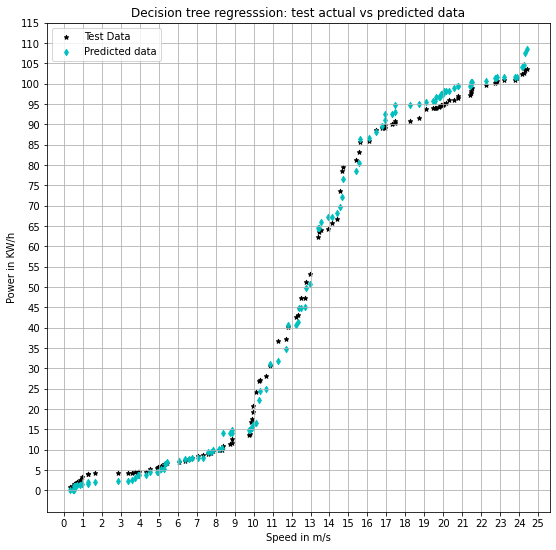

In [37]:
# Generate the predictions array
predict_DTR = DTR_model.predict(sp_test_ar.reshape(-1,1))       # Use the model to predict the power values using the speed test array

# Plot the actual vs predictions array for the decision tree regression model
plt.figure(figsize = (9, 9))                                    # Set the plot size
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(po_test_ar), s = 20, marker = "*", color = "k", label = "Test Data") # Plot the speed and power on a graph
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(predict_DTR), s = 20, marker = "d", color = "c", label = "Predicted data") # Plot the speed and power on a graph
plt.xticks(np.arange(0, round(cleansed_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(cleansed_df["power"].max(), 0) + 4, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KW/h")                                     # Label the y axis
plt.xlabel("Speed in m/s")                                      # Label the x axis
plt.legend(loc = "best")                                        # Put the legend in the best place
plt.title("Decision tree regresssion: test actual vs predicted data")  # Title of the graph
plt.show()                                                      # Show the graph

### Visual review of the decision tree regression
As can be seen in the plot above, the decision tree maps reasonably well against the test data. While it is not perfect, there are areas, especially 4.5 – 8.5 m/s where the predictions seem to be fairly accurate. In the areas below 4.5 m/s the decision tree seems to underestimate the wind power generated. There is also noticeable overestimation above 17 m/s. In the wind speeds between 8.5 and 17 m/s the model seems to range from slightly under to slightly over estimating, depending on the values for the wind speed.
***
## Random Forest Regression
### What is a random forest regression?
A random forest regression model is a model that uses a number of decision trees to try and determine the best regression model for the data given, hence the name “Random Forest” <a href=”https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn”>(Malik, 2019)</a>. As such, like the decision tree regression, it is also a supervised machine learning algorithm. The random forest regression amalgamates the outcomes of the different decision trees, and produces and average for each decision point <a href=”https://gdcoder.com/random-forest-regressor-explained-in-depth/”?>(Drakos, 2019)</a>. This provides more accuracy and stability within the model, giving more consistent models.

The random forest has an advantage over the decision tree models through the use of the multiple decision trees. This removes the risk caused by a model being heavily influenced by outlier data. It also removes the risks of overfitting and underfitting <a href=https://medium.com/swlh/random-forest-algorithm-in-laymans-language-ffd31b3cfd29> (Saravanan, 2020)</a>. 
### Random forest code
The random forest regression code is run using <a href=”https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor”>Sklearn’s random forest regressor library</a>. The random forest model has a default value of 100 iterations to try and determine the best regression model. By leaving the number of iterations blank, the default value is used. As always, the training sets are used to train the models. 

The model is saved to the <a href=”Models/”>Models folder</a>, as *RFR.pkl*, where it can be retrieved for further use, as required.



In [38]:
RFR_model = RandomForestRegressor().fit(sp_train_ar.reshape(-1,1), po_train_ar) # Create the random forest model, using the speed and power training arrays

filename_RFR ="Models/RFR.pkl"                                  # State the file save location
joblib.dump(RFR_model, filename_RFR)                            # Save the model as RFR in the model folder

['Models/RFR.pkl']

### Actual vs predictions
As above, a visual review of the actual versus predicted values can be conducted, through plotting the test data, as per below.

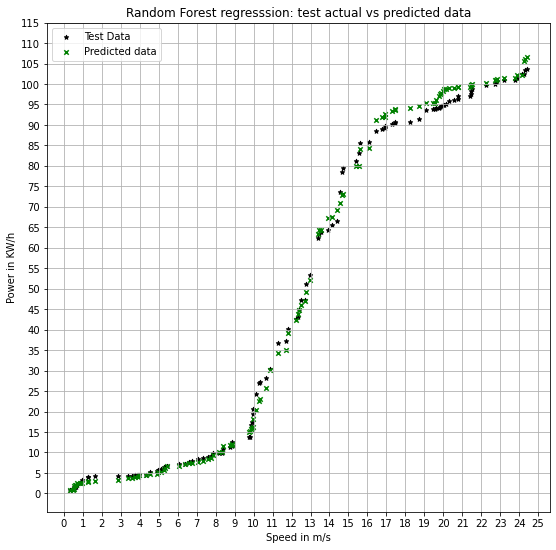

In [39]:
# Generate the predictions array
predict_RFR = RFR_model.predict(sp_test_ar.reshape(-1,1))       # Use the model to predict the power values using the speed test array 

# Plot the actual vs predictions array for the random forest regression model
plt.figure(figsize = (9, 9))                                    # Set the plot size
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(po_test_ar), s = 20, marker = "*", color = "k", label = "Test Data") # Plot the speed and power on a graph
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(predict_RFR), s = 20, marker = "x", color = "g", label = "Predicted data") # Plot the speed and power on a graph
plt.xticks(np.arange(0, round(cleansed_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(cleansed_df["power"].max(), 0) + 4, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KW/h")                                     # Label the y axis
plt.xlabel("Speed in m/s")                                      # Label the x axis
plt.legend(loc = "best")                                        # Put the legend in the best place
plt.title("Random Forest regresssion: test actual vs predicted data")  # Title of the graph
plt.show()                                                      # Show the graph

### Visual review of the random forest regression
Similar to the decision tree plots, the random forest regression maps reasonably closely to the test data. The predicted values below 10 m/s seem to be almost the same as the test data, which differs from the decision tree. In the space between 10 and 14.5 m/s there seems to be small differences, with the predictions seemingly underestimating the test data. Above 14.5 m/s the random forest predictions, like the decision tree predictions seem to overestimate the test values, although they do see to converge towards the upper wind speed values.
***
## Sigmoid model
### What is a sigmoid model / best fit curve?
A final approach was tested, whereby it was attempted to map a sigmoid curve to the data. Unlike the other regression models designed, this approach does not require regression data. Instead, an attempt was to determine the curve that best fit the training data set. From a visual inspection, it was determined that the curve was generally a sigmoid (or S-shaped) curve or function. A sigmoid curve is a function that has only one inflection point and generally has limits as y approaches -1 and 1, and is given by the formula:
<a href=https://mathworld.wolfram.com/SigmoidFunction.html>$$ S(x) =  \frac{1}{(1 + e^{-x})} \\ $$</a>
It is possible to adapt this definition so that the limit is moved to y = 0, and the maximum value of the training data set.
### Sigmoid model code
Adapting <a href=”https://stackoverflow.com/a/62215374/4430536”>user88484’s (2020)</a> appraoch, and <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html>SciPy’s curve_fit library</a>, it is possible to determine the optimal parameter values (*popt*) for the sigmoid function, to reduce the sum of the residuals between the actual data, and the curve data. Unlike user88484’s formula, the noise value (“b”) has been removed from the formula, as we know that it is possible to have a value of [0, 0] (this is similar to the intercept fitting in the linear regression model).

In order to calculate the sigmoid function, it is necessary to determine some initial values, such as the max and min of the power training set, the median of the speed training set, and 1. This matrix is then fed into the sigmoid function, with the training data sets, in order to determine the best fit curve. This curve then gives the optimised parameters for the curve, as well as the covariance of the curve.

Like the other models, the optimised parameter values have been saved <a href=”Models/”>Models folder</a> for future retrieval. Unlike the other models, this file is saved as a csv, as it contains a series of values that can be used to recreate the curve.


In [40]:
def sigmoid(x, L, x0, k, b):                                    # Function to define the sigmoid
    y = L / (1 + np.exp(-k*(x-x0)))                             # Sigmoid formula
    return (y)                                                  # Return the coefficients for the sigmoid curve

p0 = [max(po_train_ar), np.median(sp_train_ar), 1, min(po_train_ar)]    # Initial guess to start the sigmoid coefficients

popt, pcov = curve_fit(sigmoid, sp_train_ar, po_train_ar, p0, method='dogbox')  # Find the optimized values for the parameters (popt) and covariance of popt

# Save sigmoid optimized values for later use 
np.savetxt("Models/popt.csv", popt, delimiter = ",")            # Export the popt values for later reuse

### Actual vs predictions
As above, a visual review of the actual versus predicted values can be conducted, through plotting the test data, as per below.


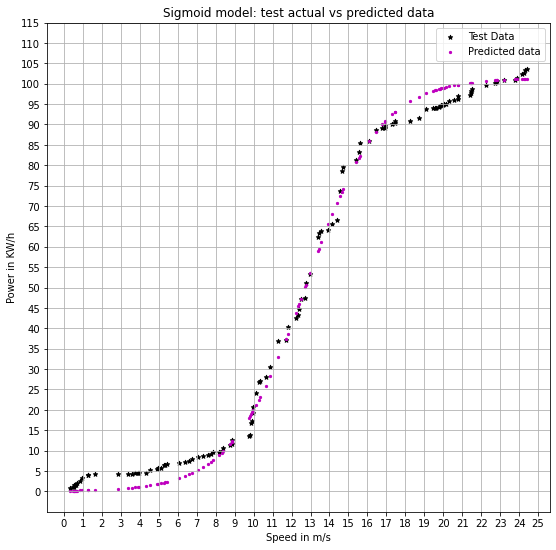

In [41]:
# Generate the predictions array
predict_sig = sigmoid(sp_test_ar, *popt)                        # Use the sigmoid optimised values to predict the power values using the speed test array

# Plot the actual vs predictions array for the sigmoid model
plt.figure(figsize = (9, 9))                                    # Set the plot size
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(po_test_ar), s = 20, marker = "*", color = "k", label = "Test Data") # Plot the speed and power on a graph
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(predict_sig), s = 20, marker = ".", color = "m", label = "Predicted data") # Plot the speed and power on a graph
plt.xticks(np.arange(0, round(cleansed_df["speed"].max(), 0) + 2, step = 1)) # Force all the xticks to be visible
plt.yticks(np.arange(0, round(cleansed_df["power"].max(), 0) + 4, step = 5)) # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KW/h")                                      # Label the y axis
plt.xlabel("Speed in m/s")                                      # Label the x axis
plt.legend(loc = "best")                                        # Put the legend in the best place
plt.title("Sigmoid model: test actual vs predicted data")       # Title of the graph
plt.show()                                                      # Show the graph

### Visual review of sigmoid model / best fit curve
As can be seen above, the sigmoid function / best fit curve approaches the limits at power = 0 kW/h and approximately power = 101 kW/h. This suggests that the maximum values for power is slightly above 101 kW/h, when wind speed is greater than 25 m/s. The curve seems to underestimate the amount of power generated when wind speeds are below 9 m/s, while overestimating when wind speed is between 17 m/s and 23 m/s. As noted above, the curve will underestimate the power generated when the wind speed exceeds 25 m/s. In the range between 9 m/s and 17 m/s the predicted values seem to match reasonably well with the actual test data, with a mix of over and underestimates.
***
### All model predictions vs actual test data
As done in all the regression models above, a visual review of the actual versus predicted values can be conducted, through plotting the test data, as per below. In this case, we can plot all the predicted data, for each model on the same graph. This gives a better representation of where each model predicts any given points vis-a-vis the original test data.

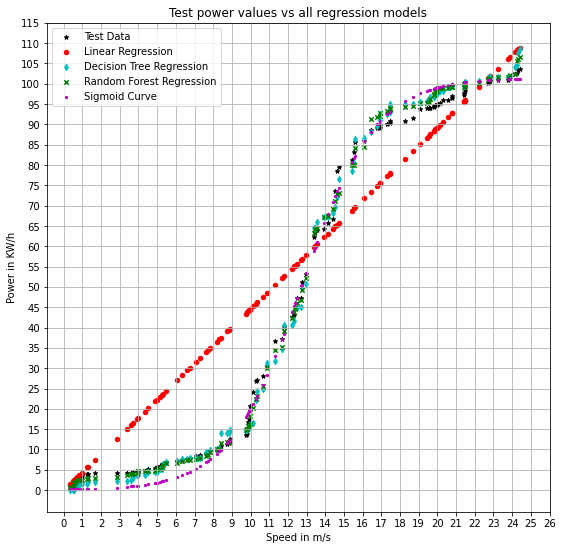

In [42]:
# Plot the original testing data vs all models
plt.figure(figsize = (9,9))                                     # Set the size of the plot area
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(po_test_ar), s = 20, marker = "*", color = "k", label = "Test Data") # Plot the speed and power on a graph
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(predict_lin), s = 20, color = "r", label = "Linear Regression")     # Create a scatter graph using the linear regression estimates from the analysed data
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(predict_DTR), s = 20, marker = "d", color = "c", label = "Decision Tree Regression")  # Create a scatter graph using the decision tree regression estimates from the analysed data
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(predict_RFR), s = 20, marker = "x", color = "g", label = "Random Forest Regression")  # Create a scatter graph using the random forest regression estimates from the analysed data
plt.scatter(x = np.sort(sp_test_ar), y = np.sort(predict_sig), s = 20, marker = ".", color = "m", label = "Sigmoid Curve")     # Create a scatter graph using the sigmoid model estimated from the analysed data
plt.xticks(np.arange(0, 27, step = 1))                          # Force all the xticks to be visible
plt.yticks(np.arange(0, 120, step = 5))                         # Force all the xticks to be visible
plt.grid(which = "major", axis = "x")                           # Show the minor grid lines on the x axis
plt.grid(which = "major", axis = "y")                           # Show the minor grid lines on the y axis
plt.ylabel("Power in KW/h")                                     # Label for the y axis
plt.xlabel("Speed in m/s")                                      # Label for the x axis
plt.legend(loc = "best")                                        # Determine the best location for the legend to be places
plt.title("Test power values vs all regression models")         # Title for the chart
plt.show()                                                      # Plot the graphs

### Visual review of overlaid plots

The overlaid data shows that the sigmoid model / best fit curve, as well as the decision tree and random forest models behave reasonably similar, at least on a visual inspection. However it is clear that the linear regression model gives reasonably accurate results only in certain areas (around 1 m/s, 13 – 14 m/s, and 22 m/s). In all other areas it either overestimates or underestimates the expected values.

It is difficult to determine which model is the most accurate, using visual reviews of the plots. As such, it is necessary to conduct an analysis of the data using mathematical means.
***
## Error calculation
Apart from the visual representation of the accuracy of the predicted data versus the actual test data, it is also possible to conduct a mathematical analysis of fit of each model. To do this, we can use a number of different calculation techniques, including:

<b><u><a href=”https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html>Mean Square Error</a></u></b> (MSE): The mean square error shows the mean of the square of the errors between the predicted values and the actual values in a regression <a href=https://www.statisticshowto.com/mean-squared-error/> (Glen, 2013)</a>. Values closer to 0 indicate that the regression model being tested has reduced the amount of differences between the predicted and actual results.

<b><u>Root mean square</u></b> (RMSE): Simply the square root of the mean square error <a href="https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/">(akhilendra, 2021)</a>. Values closer to 0 indicate that the regression model being tested has reduced the amount of differences between the predicted and actual results.

<b><u><a href=”https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html”>R-squared score</a></u></b>: The R-squared score, or coefficient of determination, is used to determine how changes in one variable can be used to explain the variances in another variable <a href=https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/> (Glen, 2020)</a>. The value of R-squared ranges from 0 – 1, and can be expressed as a number or a percentage. Values closer to 1 mean that more fo the variances in the model can be explained. It can generally only be used for linear regression models.

<b><u><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html">Mean Absolute Error</a></u></b> (MAE): The mean absolute error is mean of the absolute difference between the predicted and actual values <a href=https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d> (JJ, 2016)</a>. This differs from the mean square in that the sign of the difference is ignored before the mean is calculated (e.g. if the difference between a predicted and actual value is -10, the absolute value is calculated as 10). Values closer to 0 indicate that the regression model being tested has reduced the amount of differences between the predicted and actual results.

These 4 methods can be used to determine which regression model is best to use for the given data set. The results for the 4 methods are presented below for each model.

###### Note:
As the sigmoid model / best fit curve, as well as the decision tree and random forest regresssions are not a linear regressions models <a href="https://hub.packtpub.com/why-decision-trees-are-more-flexible-than-linear-models-explains-stephen-klosterman/"> (Packtpub.com, 2019)</a> , it is not suitable to use R-squared as a measure of the fit of the regression <a href="https://statisticsbyjim.com/regression/r-squared-invalid-nonlinear-regression ">(Frost, 2017)</a>, <a href=https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2892436/> (Spiess & Neumeyer, 2010)</a>. As such, R-Square results have been excluded from the calculations below.

In [43]:
# Error calculations for each model
# Mean squared error using sklearn's mean_squared_error
mse_lin = mean_squared_error(predict_lin, po_test_ar)
mse_DTR = mean_squared_error(predict_DTR, po_test_ar)
mse_RFR = mean_squared_error(predict_RFR, po_test_ar)
mse_SIG = mean_squared_error(predict_sig, po_test_ar)

# Root mean squared error
rmse_lin = np.sqrt(mse_lin)
rmse_DTR = np.sqrt(mse_DTR)
rmse_RFR = np.sqrt(mse_RFR)
rmse_SIG = np.sqrt(mse_SIG)                                     

# Determine the mean absolute error
AMEL = mean_absolute_error(po_test_ar, predict_lin)             # Sum the analysis_df values of the absolute differences for the linear regression and divide by the number of rows
AMED = mean_absolute_error(po_test_ar, predict_DTR)             # Sum the analysis_df values of the absolute differences for the random forest regression and divide by the number of rows
AMER = mean_absolute_error(po_test_ar, predict_RFR)             # Sum the analysis_df values of the absolute differences for the decision tree regression and divide by the number of rows
AMES = mean_absolute_error(po_test_ar, predict_sig)             # Sum the analysis_df values of the absolute differences for the sigmoid and divide by the number of rows

# Difference with min root mean squared error
diff_r_lin = (rmse_lin - min(rmse_lin, rmse_DTR, rmse_RFR, rmse_SIG))/min(rmse_lin, rmse_DTR, rmse_RFR, rmse_SIG)*100
diff_r_DTR = (rmse_DTR - min(rmse_lin, rmse_DTR, rmse_RFR, rmse_SIG))/min(rmse_lin, rmse_DTR, rmse_RFR, rmse_SIG)*100
diff_r_RFR = (rmse_RFR - min(rmse_lin, rmse_DTR, rmse_RFR, rmse_SIG))/min(rmse_lin, rmse_DTR, rmse_RFR, rmse_SIG)*100
diff_r_SIG = (rmse_SIG - min(rmse_lin, rmse_DTR, rmse_RFR, rmse_SIG))/min(rmse_lin, rmse_DTR, rmse_RFR, rmse_SIG)*100

# Difference with min mean absolute error
diff_a_lin = (AMEL - min(AMEL, AMED, AMER, AMES))/min(AMEL, AMED, AMER, AMES)*100
diff_a_DTR = (AMED - min(AMEL, AMED, AMER, AMES))/min(AMEL, AMED, AMER, AMES)*100
diff_a_RFR = (AMER - min(AMEL, AMED, AMER, AMES))/min(AMEL, AMED, AMER, AMES)*100
diff_a_SIG = (AMES - min(AMEL, AMED, AMER, AMES))/min(AMEL, AMED, AMER, AMES)*100

# Create a table to compare and contrast errors for each model
table = PrettyTable(["Model / vs test array", "MSE", "RMSE", "MAE", "Dif % w/ min RMSE", "Dif % w/ min MAE"])    
table.add_row(["Linear Regression", "%.4f" % mse_lin, "%.4f" % rmse_lin, "%.4f" % AMEL, "%.2f%%" % diff_r_lin, "%.2f%%" % diff_a_lin])
table.add_row(["Decision Tree Regression", "%.4f" % mse_DTR, "%.4f" % rmse_DTR, "%.4f" % AMED, "%.2f%%" % diff_r_DTR, "%.2f%%" % diff_a_DTR])
table.add_row(["Random Tree Regression", "%.4f" % mse_RFR, "%.4f" % rmse_RFR, "%.4f" % AMER,"%.2f%%" % diff_r_RFR, "%.2f%%" % diff_a_RFR])
table.add_row(["Sigmoid Model / best fit curve", "%.4f" % mse_SIG, "%.4f" % rmse_SIG, "%.4f" % AMES,"%.2f%%" % diff_r_SIG, "%.2f%%" %  diff_a_SIG])

print(table)

+--------------------------------+----------+---------+---------+-------------------+------------------+
|     Model / vs test array      |   MSE    |   RMSE  |   MAE   | Dif % w/ min RMSE | Dif % w/ min MAE |
+--------------------------------+----------+---------+---------+-------------------+------------------+
|       Linear Regression        | 241.4083 | 15.5373 | 12.8347 |      242.69%      |     255.30%      |
|    Decision Tree Regression    | 28.3283  |  5.3224 |  4.2285 |       17.39%      |      17.06%      |
|     Random Tree Regression     | 22.3731  |  4.7300 |  3.7468 |       4.32%       |      3.72%       |
| Sigmoid Model / best fit curve | 20.5567  |  4.5340 |  3.6123 |       0.00%       |      0.00%       |
+--------------------------------+----------+---------+---------+-------------------+------------------+


## Review of error calculations
The above calculations seem to give a better understanding of the suitability and fit of the models versus the actual data. In all cases, the best fit (lowest scores) are to be found in the sigmoid model / best fit curve. This is followed in ascending order by the random forest model, the decision tree model, and finally the linear regression model. 

In most cases, the different models would not result in the different models maintaining the same order across each of the error calculations. In that case, it would be necessary to determine which model is the most suitable by determining which error calculation should be used for ranking. <a href=”https://people.duke.edu/~rnau/compare.htm”> Nau (2007)</a> suggests that the rankings of appropriate error calculations should start with root mean squared error, followed by mean absolute error. Other measures can also be used, but have not been calculated for the data.

Returning to the data above, and comparing the root mean squared error for all 4 models, it is clear that the sigmoid model / best fit curve is the best model to use. This is due to the fact that it has the lowest error value. However, it is also possible to determine the magnitude of the difference between the models. Using the sigmoid model as the basis, the random forest regression is approximately 4% worse (when using the root mean squared error), and 3.5% worse (when using the mean absolute error). The decision tree model is approximately 17% worse (for both RMSE and MAE) than the sigmoid model, while the linear regression is 243% and 255% worse. This indicates clearly that the sigmoid model / best fit curve is the best model to use for estimating power values from a given speed input. However, as noted above, for wind speed values above about 25 m/s, the predicted power output will be limited to approximately 101 kW/h. The other models, in this case will probably have a better estimate.

#### Notes for the website / flask connection
No model gives 100% accuracy, and each model produces reasonably accurate estimates at different points along the wind speed / power curve. As such, all 4 models are available on the website to estimate the power being generated for a given wind speed value. A note has been included to indicate that the sigmoid model has the lowest root mean square error, and suggesting that it may be the most accurate model to use for any inputs.


## Conclusion
As we can see, there are a number of different models that can be used to conduct regression analysis on data sets. The issue identifying the correct model, be it a linear regression model, or a best fit curve. This can be identified through the use of visual reviews, where the linear regression model can be seen to be unsuitable, or through the use of error calculations. It is important to note that if a different training data set was taken, the results of the error calculations would be (slightly) different, and could give a different order for the models to be used. 

It should also be noted that the data provided contained only 2 data columns, namely the wind speed and the power generated. As noted in various literature, including <a href=”https://www.mdpi.com/1996-1073/12/24/4669>Brahimi (2019)</a>, <a href =”https://www.sciencedirect.com/science/article/pii/S096014811831231X?via%3Dihub”>Stetco, et al. (2018)</a>, <a href=”https://www.mdpi.com/1996-1073/11/3/506”>Rehman, et al. (2018)</a>, there are a number of other factors that should be considered when trying to estimate the power generated from a particular wind speed. These include the radius and surface area of the blades, the material used, as well as the duration of the wind speed.

In the future, if more data became available, especially those listed above, it would be worthwhile revisiting the data and review the models. This will allow for more accuracy in the models and estimates, and to determine if there have been any changes in the underlying data. This will be especially true as it would be expected that the decision tree and random forest models’ accuracies would improve, and that the sigmoid model would lose accuracy. This is due to the decision tree and random forest models being able to determine the relationship between multiple variables, while the sigmoid analysis relies on the best fit curve with only two variables. However, without the data, it would be difficult to determine how much accuracy would be gained/lost by each model.

In summary, it is clear that there are various models that can be used, each with its own level of accuracy, and drawbacks. From the data presented, the sigmoid model / best fit curve is the model that has cumulatively least errors, and is therefore suggested as the most accurate. However, each model is accurate to a certain degree and some points, but no model is accurate at 100% of the points.

***
## Bibliography
* akhilendra, 2021. Evaluation Metrics for Regression models- MAE Vs MSE Vs RMSE vs RMSLE. [Online] Available at: https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/ [Accessed 2 January 2021].


* Bakshi, C., 2020. Decision Tree Regression. [Online] Available at: https://levelup.gitconnected.com/decision-tree-regression-df9e24ffe59a Accessed 12 January 2021].


* Brahimi, T., 2019. Using Artificial Intelligence to PredictWind Speed for Energy Application in Saudi Arabia. energies, 12(24).


* Bronshtein, A., 2017. Train/Test Split and Cross Validation in Python. [Online] Available at: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 [Accessed 2 January 2021].


* Brownlee, J., 2020. Train-Test Split for Evaluating Machine Learning Algorithms. [Online] Available at: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/. [Accessed 2 January 2021].


* Chowdhury, M., 2018. In machine learning, what’s the purpose of splitting data up into test sets and training sets?. [Online] Available at: https://qr.ae/pNxQZ8 Accessed 2 January 2021].


* Drakos, G., 2019. Decision Tree Regressor explained in depth. [Online] Available at: https://gdcoder.com/decision-tree-regressor-explained-in-depth/ Accessed 10 January 2021].


* Drakos, G., 2019. Random Forest Regressor explained in depth. [Online] Available at: https://gdcoder.com/random-forest-regressor-explained-in-depth/ [Accessed 11 January 2021].


* Edpresso Team, 2020. Calculating Mean Squared Error in Python. [Online] Available at: https://www.educative.io/edpresso/calculating-mean-squared-error-in-python Accessed 20 December 2020].


* Frost, J., 2017. R-squared Is Not Valid for Nonlinear Regression. [Online] Available at: https://statisticsbyjim.com/regression/r-squared-invalid-nonlinear-regression Accessed 12 January 2021].


* Glen, S., 2013. Mean Squared Error: Definition and Example. [Online] Available at: https://www.statisticshowto.com/mean-squared-error/ [Accessed 2 January 2021].


* Glen, S., 2020. Coefficient of Determination (R Squared): Definition, Calculation. [Online] Available at: https://www.statisticshowto.com/probability-and-statistics/coefficient-of-determination-r-squared/ [Accessed 2 January 2021].


* Gupta, P., 2017. Decision Trees in Machine Learning. [Online] Available at: https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052 [Accessed 12 January 2021].


* JJ, 2016. MAE and RMSE — Which Metric is Better?. [Online] Available at: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d [Accessed 2 January 2021].


* Kite.com, 2020. How to calculate R squared with NumPy in Python. [Online] Available at: https://www.kite.com/python/answers/how-to-calculate-r-squared-with-numpy-in-python#:~:text=This%20measure%20ranges%20from%200,can%20be%20predicted%20without%20error. Accessed 20 December 2020].


* Koehrsen, W., 2017. Random Forest Simple Explanation. [Online] Available at: https://williamkoehrsen.medium.com/random-forest-simple-explanation-377895a60d2d [Accessed 2 January 2021].


* Malik, U., 2019. Random Forest Algorithm with Python and Scikit-Learn. [Online] Available at: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/ [Accessed 14 January 2021].


* Nau, B., 2007. What's the bottom line? How to compare models. [Online] Available at: https://people.duke.edu/~rnau/compare.htm [Accessed 30 December 2020].


* Packtpub.com, 2019. Why decision trees are more flexible than linear models, explains Stephen Klosterman. [Online] Available at: https://hub.packtpub.com/why-decision-trees-are-more-flexible-than-linear-models-explains-stephen-klosterman [Accessed 12 January 2021].


* Ramzai, J., 2020. Simple guide for Top 2 types of Decision Trees: CHAID & CART. [Online] Available at: https://towardsdatascience.com/clearly-explained-top-2-types-of-decision-trees-chaid-cart-8695e441e73e [Accessed 12 January 2021].


* Rehman, S. R. S., Alam, M. M., Alhems, L. M. & ID, M. M. R., 2018. Horizontal Axis Wind Turbine Blade Design Methodologies for Efficiency Enhancement—A Review. Energies, 11(13).


* Saravanan, 2020. Random Forest in Complete Layman’s Language. [Online] Available at: https://medium.com/swlh/random-forest-algorithm-in-laymans-language-ffd31b3cfd29 [Accessed 12 January 2021].


* Scikit Learn, 2020. Decision Tree Regression. [Online] Available at: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py [Accessed 2 January 2021].


* Scikit Learn, 2020. sklearn.ensemble.RandomForestRegressor. [Online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html [Accessed 14 January 2021].


* Scikit learn, 2020. sklearn.metrics.mean_squared_error. [Online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html [Accessed 2 January 2021].


* Scikit learn, 2020. sklearn.metrics.r2_score. [Online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html [Accessed 2 January 2021].


* Scikit Learn, 2020. sklearn.model_selection.train_test_split. [Online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html [Accessed 20 December 2020].


* Scikit Learn, 2020. sklearn.tree.DecisionTreeRegressor. [Online] 
Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
[Accessed 2 January 2021].


* SciPy.org, 2020. scipy.optimize.curve_fit. [Online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html [Accessed 14 December 2020].


* Seif, G., 2018. A Guide to Decision Trees for Machine Learning and Data Science. [Online] Available at: https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956 [Accessed 12 January 2021].


* Spiess, A.-N. & Neumeyer, N., 2010. An evaluation of R2 as an inadequate measure for nonlinear models in pharmacological and biochemical research: a Monte Carlo approach. [Online] Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2892436/ [Accessed 12 January 2021].


* Stetco, A. et al., 2018. Machine learning methods for wind turbine condition monitoring: A review. Renewable Energy, Volume 133, pp. 620 - 635.


* Stojiljković, M., 2020. Linear Regression in Python. [Online] Available at: https://realpython.com/linear-regression-in-python/ [Accessed 20 December 2020].


* user88484, 2020. Fit sigmoid function (“S” shape curve) to data using Python. [Online] Available at: https://stackoverflow.com/a/62215374/4430536 [Accessed 14 Decmeber 2020].


* Wolfram, 2021. Sigmoid Function. [Online] Available at: https://mathworld.wolfram.com/SigmoidFunction.html [Accessed 14 January 2021].


* Wood, T., 2021. Sigmoid Function. [Online] Available at: https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function [Accessed 14 January 2021].


* Yse, D. L., 2019. The Complete Guide to Decision Trees. [Online] Available at: https://towardsdatascience.com/the-complete-guide-to-decision-trees-28a4e3c7be14 [Accessed 12 January 2021].


* Zach, 2020. How to Calculate RMSE in Python. [Online] Available at: https://www.statology.org/rmse-python/ [Accessed 20 December 20520].